In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import os

## 0. Preamble

In [2]:
comparison_result_dir = "no_plugin_result"
result_dir = "double_loop_plugin_multiperiod_wind_battery"
rts_dir = "/home/xgao1/DowlingLab/RTS-GMLC/RTS_Data/SourceData"

renewable_gen = "309_WIND_1"
bus = 309

In [3]:
tracker_df = pd.read_csv(os.path.join(result_dir, "tracker_detail.csv"))
tracker_df = tracker_df.loc[tracker_df["Horizon [hr]"]==0]
tracker_df["Time Index"] = range(len(tracker_df))
tracker_df

,Date,Hour,Horizon [hr],Power Dispatch [MW],Power Output [MW],Power Underdelivered [MW],Power Overdelivered [MW],Time Index
0,2020-01-02,0,0,0.00,0.00,0.0,0.0,0
48,2020-01-02,1,0,0.00,0.00,0.0,0.0,1
96,2020-01-02,2,0,0.94,0.94,0.0,0.0,2
144,2020-01-02,3,0,25.14,25.14,0.0,0.0,3
192,2020-01-02,4,0,7.32,7.32,0.0,0.0,4
...,...,...,...,...,...,...,...,...
7824,2020-01-08,19,0,218.81,218.81,0.0,0.0,163
7872,2020-01-08,20,0,220.03,220.03,0.0,0.0,164
7920,2020-01-08,21,0,196.59,196.59,0.0,0.0,165
7968,2020-01-08,22,0,196.18,196.18,0.0,0.0,166


Text(0.5, 1.0, '309_WIND_1 Plugin Power Output')

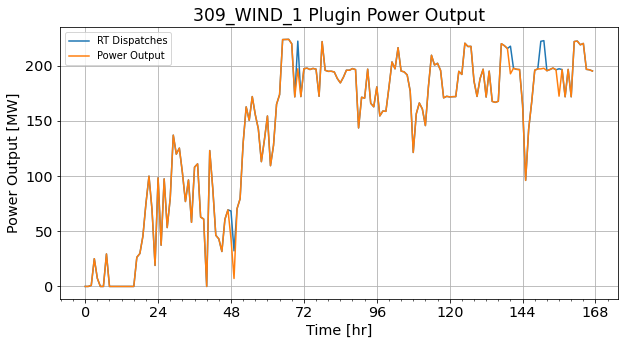

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
tracker_df.plot(x="Time Index", y="Power Dispatch [MW]", ax=ax, label='RT Dispatches')
tracker_df.plot(x="Time Index", y="Power Output [MW]", ax=ax, label='Power Output')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Power Output [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.xaxis.set_major_locator(MultipleLocator(24))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Plugin Power Output", fontsize='xx-large')

In [5]:
tracking_model_df = pd.read_csv(os.path.join(result_dir, "tracking_model_detail.csv"))
tracking_model_df = tracking_model_df.loc[tracking_model_df["Horizon [hr]"]==0]
tracking_model_df["Time Index"] = range(len(tracking_model_df))
tracking_model_df

,Date,Hour,Horizon [hr],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Battery Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Total Cost [$],Time Index
0,2020-01-02,0,0,1.57,0.00,0.00,0.0,1.57,1.57,981.74,0
48,2020-01-02,1,0,20.51,0.00,0.00,0.0,20.51,22.08,981.74,1
96,2020-01-02,2,0,25.94,0.94,0.94,0.0,25.00,47.08,981.74,2
144,2020-01-02,3,0,35.09,25.14,25.14,0.0,9.95,57.03,981.74,3
192,2020-01-02,4,0,32.32,7.32,7.32,0.0,25.00,82.03,981.74,4
...,...,...,...,...,...,...,...,...,...,...,...
7824,2020-01-08,19,0,193.81,218.81,193.81,25.0,0.00,25.00,981.74,163
7872,2020-01-08,20,0,195.03,220.03,195.03,25.0,0.00,0.00,981.74,164
7920,2020-01-08,21,0,196.59,196.59,196.59,0.0,0.00,0.00,981.74,165
7968,2020-01-08,22,0,196.18,196.18,196.18,0.0,0.00,0.00,981.74,166


Text(0.5, 1.0, '309_WIND_1 Plugin Tracking Power States')

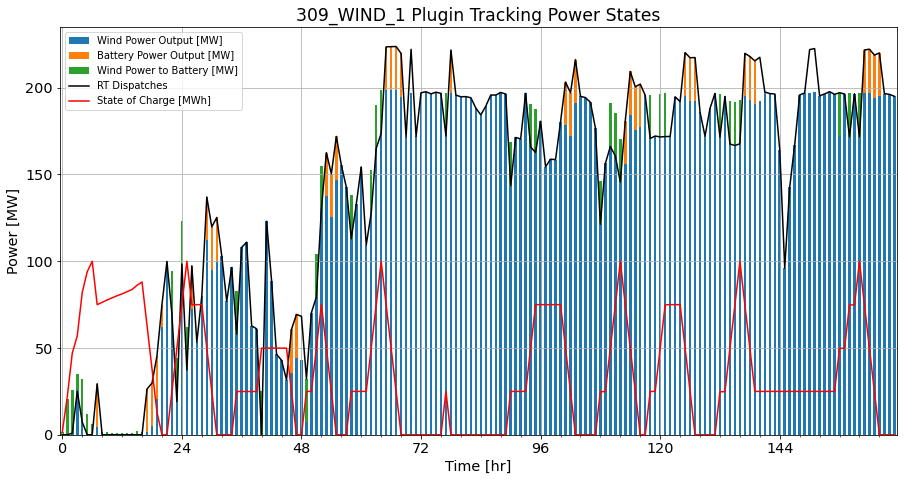

In [6]:
fig, ax = plt.subplots(figsize=(15,7.5))
cols = ["Wind Power Output [MW]", "Battery Power Output [MW]", "Wind Power to Battery [MW]", "Time Index"]
tracking_model_df[cols].plot(x="Time Index", kind='bar', stacked=True, ax=ax)
tracker_df.plot(x="Time Index", y="Power Dispatch [MW]", ax=ax, label='RT Dispatches', color="black")
tracking_model_df.plot(x="Time Index", y="State of Charge [MWh]", ax=ax, color="red")

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Power [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.xaxis.set_major_locator(MultipleLocator(24))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Plugin Tracking Power States", fontsize='xx-large')

In [7]:
bidding_model_df = pd.read_csv(os.path.join(result_dir, "bidding_model_detail.csv"))
bidding_model_df = bidding_model_df.loc[bidding_model_df["Horizon [hr]"]<24]
bidding_model_df["Time Index"] = range(len(bidding_model_df))
#bidding_model_df

Text(0.5, 1.0, '309_WIND_1 Plugin Bidding Power States')

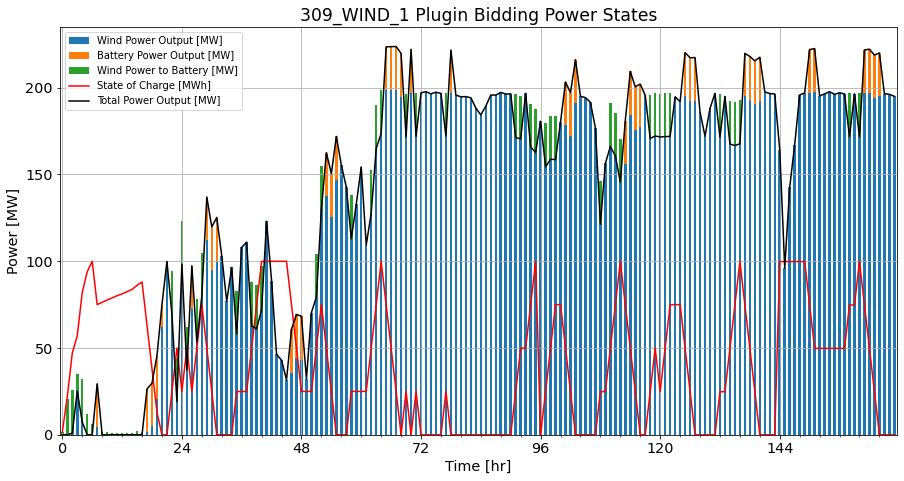

In [8]:
fig, ax = plt.subplots(figsize=(15,7.5))
cols = ["Wind Power Output [MW]", "Battery Power Output [MW]", "Wind Power to Battery [MW]", "Time Index"]
bidding_model_df[cols].plot(x="Time Index", kind='bar', stacked=True, ax=ax)
# tracker_df.plot(x="Time Index", y="Power Dispatch [MW]", ax=ax, label='RT Dispatches', color="black")
bidding_model_df.plot(x="Time Index", y="State of Charge [MWh]", ax=ax, color="red")
bidding_model_df.plot(x="Time Index", y="Total Power Output [MW]", ax=ax, color="black")

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Power [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.xaxis.set_major_locator(MultipleLocator(24))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Plugin Bidding Power States", fontsize='xx-large')

## 1. Dispatches comparison

In [9]:
# read the data
renewable_df = pd.read_csv(os.path.join(result_dir, "renewables_detail.csv"))
compare_renewable_df = pd.read_csv(os.path.join(comparison_result_dir, "renewables_detail.csv"))

# select the target gen
renewable_df = renewable_df.set_index("Generator").loc[renewable_gen]
compare_renewable_df = compare_renewable_df.set_index("Generator").loc[renewable_gen]

# add time index cols
renewable_df['Time Index'] = renewable_df.groupby("Generator").cumcount()
compare_renewable_df['Time Index'] = compare_renewable_df.groupby("Generator").cumcount()

Text(0.5, 1.0, '309_WIND_1 Real-time Power Output Comparison')

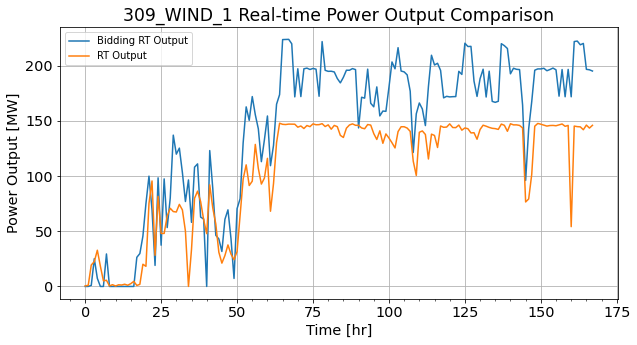

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="Output", ax=ax, label='Bidding RT Output')
compare_renewable_df.plot(x="Time Index", y="Output", ax=ax, label='RT Output')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Power Output [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Real-time Power Output Comparison", fontsize='xx-large')

Text(0.5, 1.0, '309_WIND_1 Day-ahead Power Output Comparison')

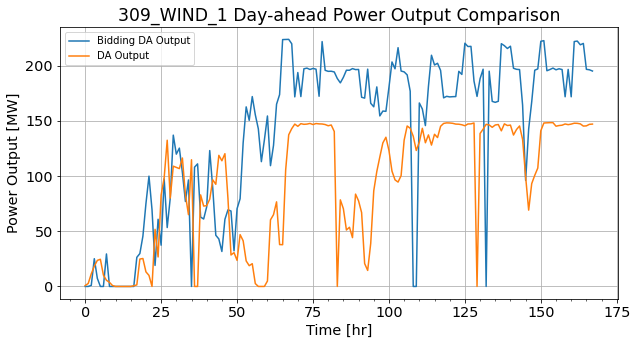

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="Output DA", ax=ax, label='Bidding DA Output')
compare_renewable_df.plot(x="Time Index", y="Output DA", ax=ax, label='DA Output')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Power Output [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Day-ahead Power Output Comparison", fontsize='xx-large')

Text(0.5, 1.0, '309_WIND_1 Curtailment Comparison')

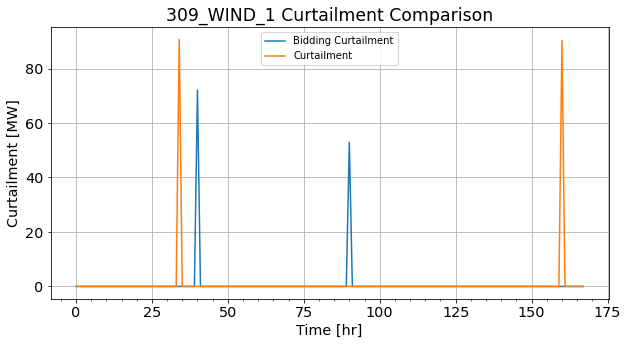

In [12]:
renewable_df["Curtailment"].sum()

fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="Curtailment", ax=ax, label='Bidding Curtailment')
compare_renewable_df.plot(x="Time Index", y="Curtailment", ax=ax, label='Curtailment')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Curtailment [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Curtailment Comparison", fontsize='xx-large')

## 2. Revenue Comparison

Text(0.5, 1.0, '309_WIND_1 Revenue Comparison')

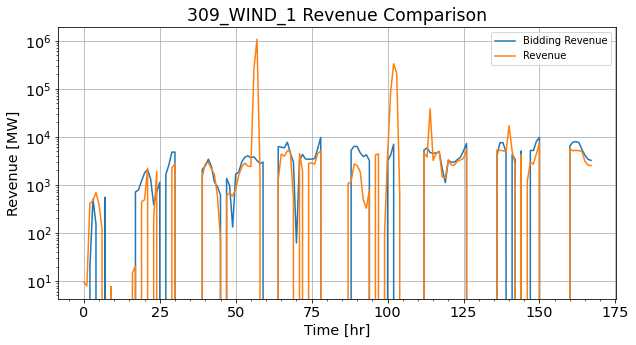

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="Unit Market Revenue", ax=ax, label='Bidding Revenue', logy=True)
compare_renewable_df.plot(x="Time Index", y="Unit Market Revenue", ax=ax, label="Revenue", logy=True)

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Revenue [MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"{renewable_gen} Revenue Comparison", fontsize='xx-large')

In [14]:
print(renewable_df["Unit Market Revenue"].sum())
print(compare_renewable_df["Unit Market Revenue"].sum())

286221.51820600004
1789057.9499809998


## 3. Price comparison

In [15]:
# read the data
renewable_df = pd.read_csv(os.path.join(result_dir, "bus_detail.csv"))
compare_renewable_df = pd.read_csv(os.path.join(comparison_result_dir, "bus_detail.csv"))

# select the target gen
bus_df = pd.read_csv(os.path.join(rts_dir, "bus.csv"))
renewable_df = renewable_df.merge(bus_df[["Bus ID", "Bus Name"]], left_on="Bus",right_on="Bus Name").set_index("Bus ID").loc[bus]
compare_renewable_df = compare_renewable_df.merge(bus_df[["Bus ID", "Bus Name"]], left_on="Bus",right_on="Bus Name").set_index("Bus ID").loc[bus]

# # add time index cols
renewable_df['Time Index'] = renewable_df.groupby("Bus ID").cumcount()
compare_renewable_df['Time Index'] = compare_renewable_df.groupby("Bus ID").cumcount()

Text(0.5, 1.0, 'Bus 309 Real-time LMP Comparison')

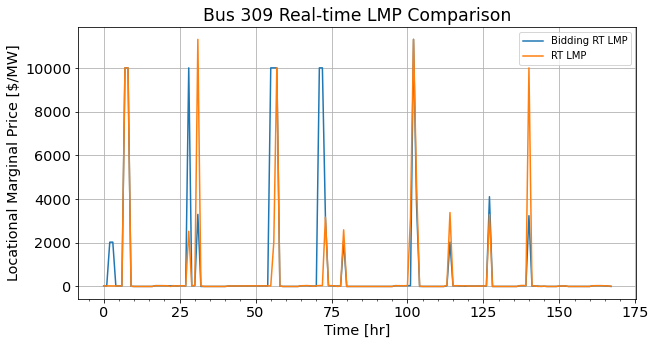

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="LMP", ax=ax, label='Bidding RT LMP')
compare_renewable_df.plot(x="Time Index", y="LMP", ax=ax, label='RT LMP')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Locational Marginal Price [$/MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"Bus {bus} Real-time LMP Comparison", fontsize='xx-large')

Text(0.5, 1.0, 'Bus 309 Day-ahead LMP Comparison')

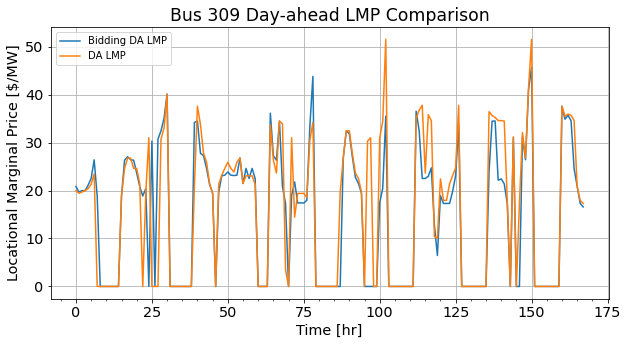

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
renewable_df.plot(x="Time Index", y="LMP DA", ax=ax, label='Bidding DA LMP')
compare_renewable_df.plot(x="Time Index", y="LMP DA", ax=ax, label='DA LMP')

ax.set_xlabel("Time [hr]", fontsize="x-large")
ax.set_ylabel("Locational Marginal Price [$/MW]", fontsize="x-large")
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', which='major', labelsize="x-large")
ax.tick_params(axis='both', which='minor', labelsize="large")

ax.grid()
ax.set_title(f"Bus {bus} Day-ahead LMP Comparison", fontsize='xx-large')